MSE Simple Data = 0.2936865367241702
R^2 Simple Data = 0.902679964795052


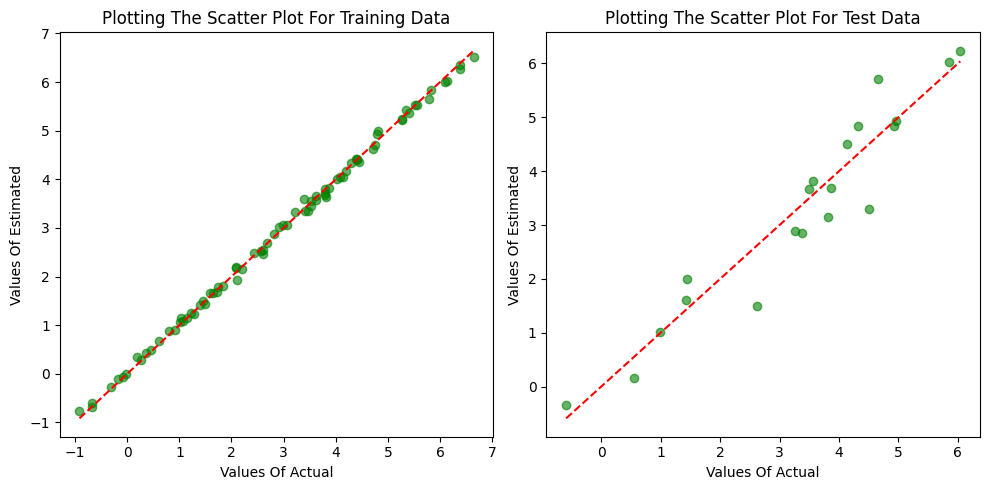

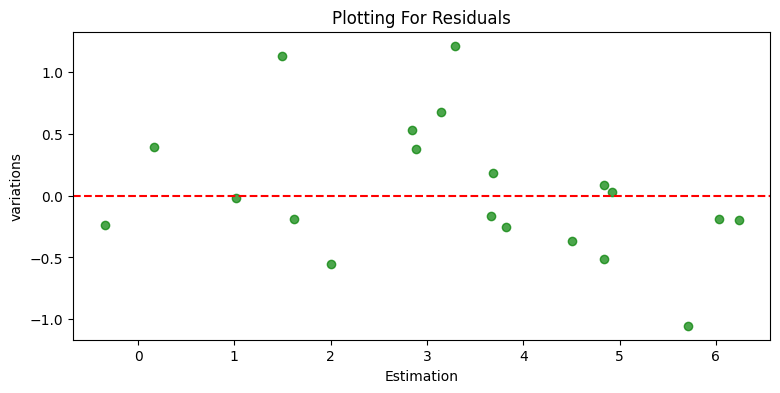

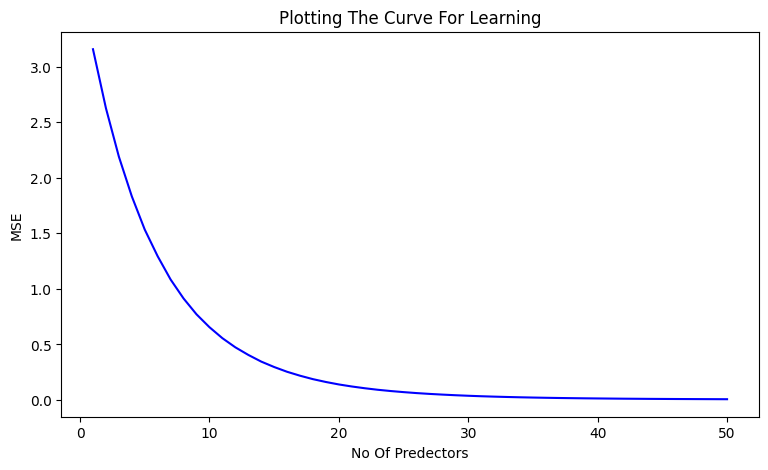

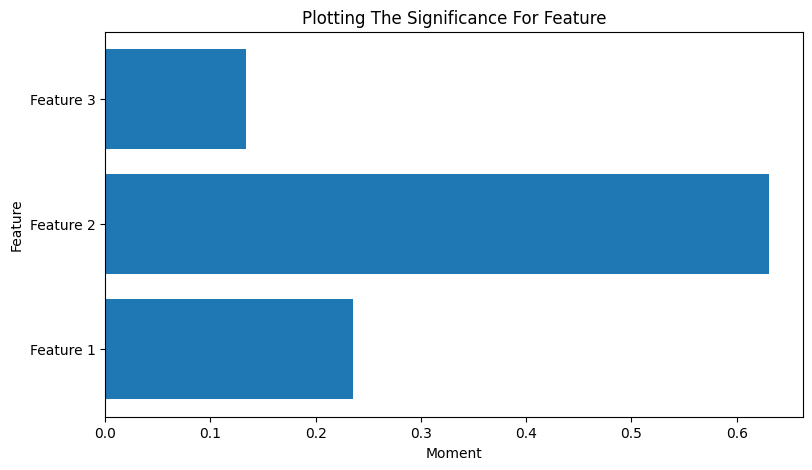

MSE Huge Datasets = 0.13562561667871229
R^2 Huge Datasets = 0.9748823781394794


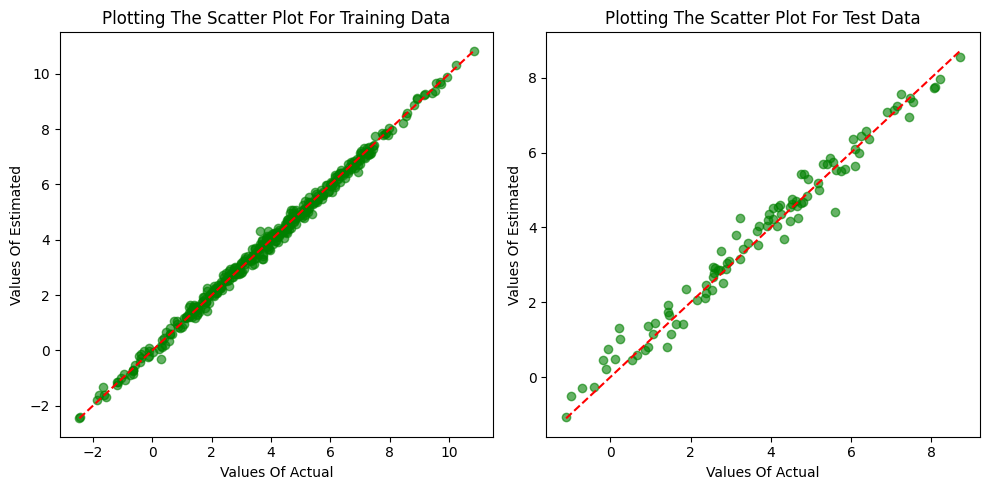

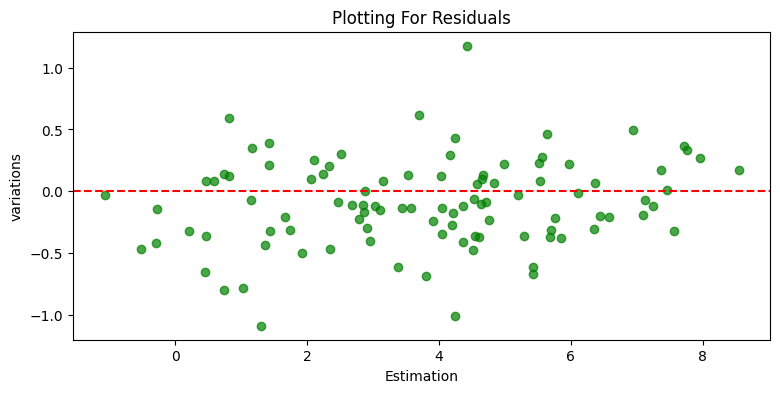

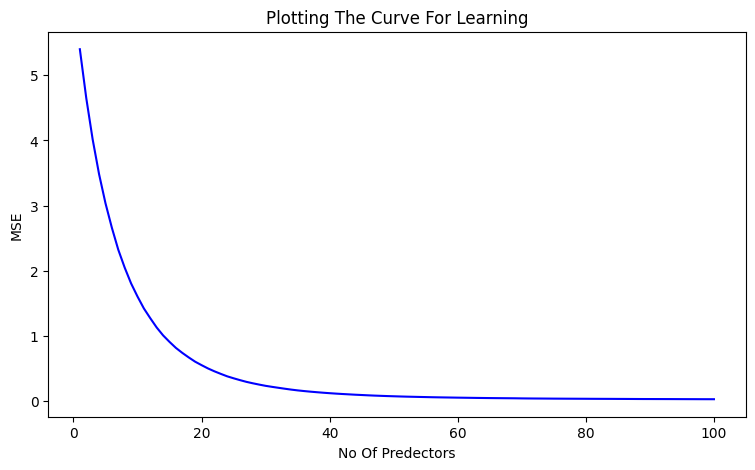

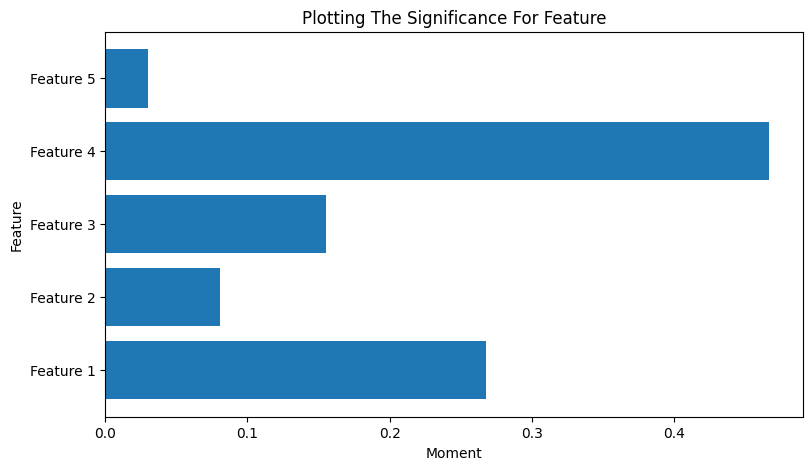

MSE For One Feature = 0.02025804588992609
R^2 For One Feature = 0.9876645340261085


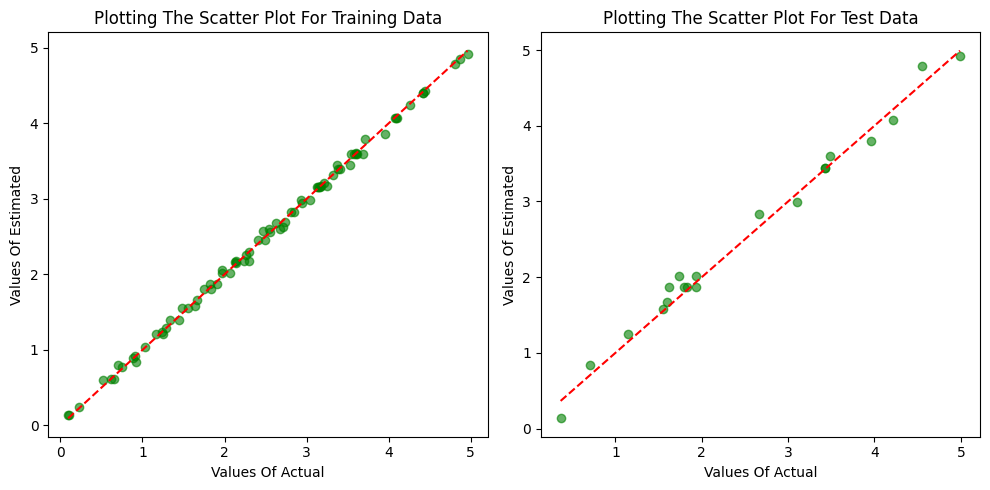

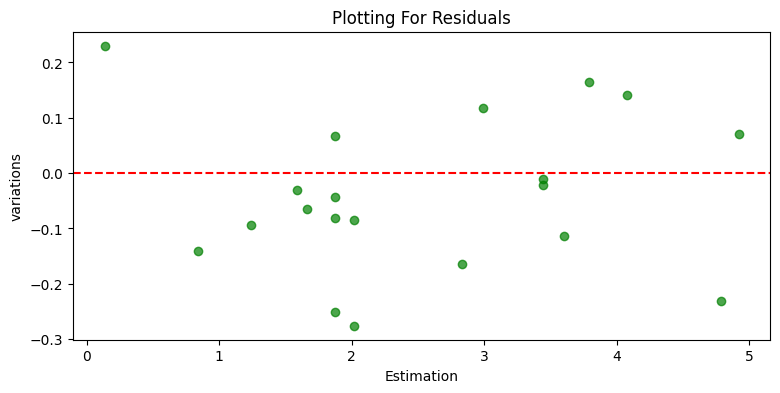

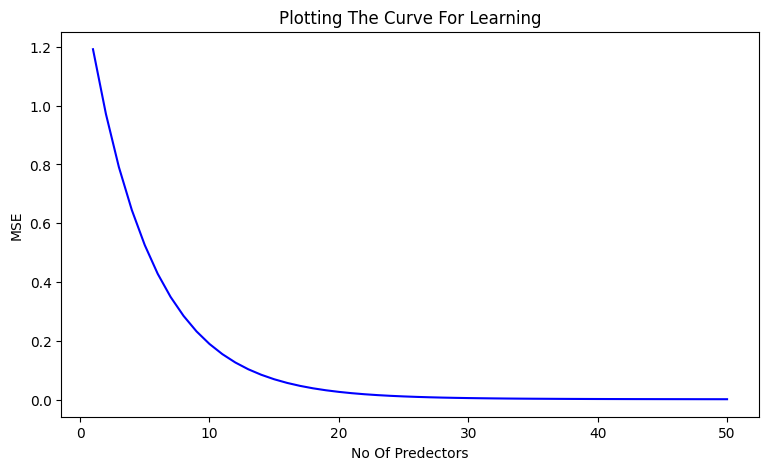

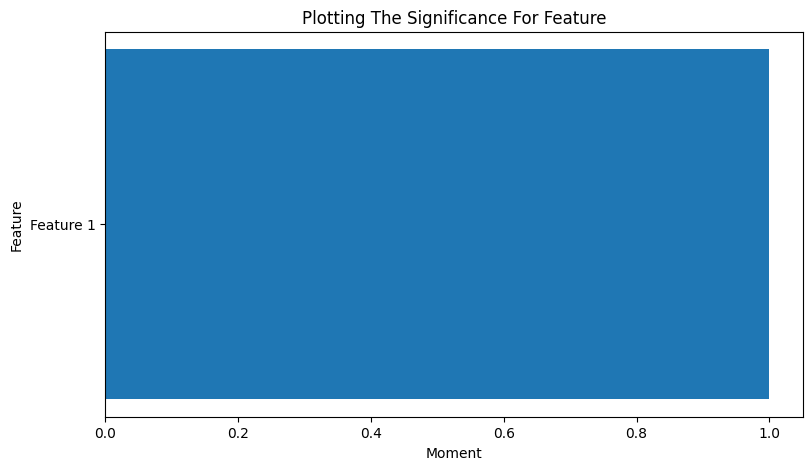

In [31]:

import numpy as np
import matplotlib.pyplot as plt
from gbt import gbt  # Importing the GBT class

# Training The Simple Datsets
def syn_data_testing():
    np.random.seed(42)
    X = np.random.rand(100, 3)
    y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.normal(0, 0.1, 100)

    split_training_ratio = 0.8
    sp_train = int(len(X) * split_training_ratio)
    train_x, test_x = X[:sp_train], X[sp_train:]
    train_y, test_y = y[:sp_train], y[sp_train:]

    model = gbt(num_est=50, learn_quan=0.1, high_dep=3, vis_process=False)
    model.fit(train_x, train_y)
    estimators = model.predict(test_x)

    # Computing The MSE and R^2
    mse = np.mean((test_y - estimators) ** 2)
    r2 = model.perform_r2(test_y, estimators)

    print(f"MSE Simple Data = {mse}")
    print(f"R^2 Simple Data = {r2}")

    assert mse < 0.3, "High MSE"
    assert r2 > 0.8, "Low R^2"

    model.scatter_train_test(train_x, train_y, test_x, test_y)
    model.showing_residuals(test_x, test_y)
    model.showing_learn_curve()
    model.showing_feature_noams([f"Feature {i+1}" for i in range(X.shape[1])])


# Features For Huge Datasets
def huge_data_testing():
    np.random.seed(100)
    X = np.random.rand(500, 5)
    y = 4 * X[:, 0] + 2 * X[:, 1] - 3 * X[:, 2] + 6 * X[:, 3] - 1 * X[:, 4] + np.random.normal(0, 0.2, 500)

    split_training_ratio = 0.8
    sp_train = int(len(X) * split_training_ratio)
    train_x, test_x = X[:sp_train], X[sp_train:]
    train_y, test_y = y[:sp_train], y[sp_train:]

    model = gbt(num_est=100, learn_quan=0.1, high_dep=3, vis_process=False)
    model.fit(train_x, train_y)
    estimators = model.predict(test_x)

    # Computing The MSE and R^2
    mse = np.mean((test_y - estimators) ** 2)
    r2 = model.perform_r2(test_y, estimators)

    print(f"MSE Huge Datasets = {mse}")
    print(f"R^2 Huge Datasets = {r2}")

    assert mse < 0.2, "High MSE"
    assert r2 > 0.7, "Low R^2"

    # Showing The Plots
    model.scatter_train_test(train_x, train_y, test_x, test_y)
    model.showing_residuals(test_x, test_y)
    model.showing_learn_curve()
    model.showing_feature_noams([f"Feature {i+1}" for i in range(X.shape[1])])

# Testing One Feature
def one_feature_testing():
    np.random.seed(123)
    X = np.random.rand(100, 1)
    y = 5 * X[:, 0] + np.random.normal(0, 0.1, 100)

    split_training_ratio = 0.8
    sp_train = int(len(X) * split_training_ratio)
    train_x, test_x = X[:sp_train], X[sp_train:]
    train_y, test_y = y[:sp_train], y[sp_train:]

    model = gbt(num_est=50, learn_quan=0.1, high_dep=3, vis_process=False)
    model.fit(train_x, train_y)
    estimators = model.predict(test_x)

    # Computing The MSE and R^2
    mse = np.mean((test_y - estimators) ** 2)
    r2 = model.perform_r2(test_y, estimators)

    print(f"MSE For One Feature = {mse}")
    print(f"R^2 For One Feature = {r2}")

    assert mse < 0.1, "High MSE"
    assert r2 > 0.9, "Low R^2"

    # Plot the results
    model.scatter_train_test(train_x, train_y, test_x, test_y)
    model.showing_residuals(test_x, test_y)
    model.showing_learn_curve()
    model.showing_feature_noams([f"Feature {i+1}" for i in range(X.shape[1])])



# Running the tests
syn_data_testing()
huge_data_testing()
one_feature_testing()

